In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import re
import json

In [14]:
fp = './data/tweets.csv'
# fp = './data/tweets.xlsx'
# fp = './data/les_miserables.json'
# fp = './data/lesmiserables.gml'
# fp = './data/cpan-authors.gexf'

In [15]:
from modules.document_processing import DocumentGraphProcessing

In [16]:
p = DocumentGraphProcessing(fp)

Enter sink and source for data processing


In [17]:
p = DocumentGraphProcessing(fp,'handle', 'original_author')

In [18]:
p.FILEPATH

'./data/tweets.csv'

In [19]:
# p.detect_filetype()

In [20]:
p.file_ext

'csv'

In [21]:
p.df

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
0,780925634159796224,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28T00:22:34,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Xr...,{'media': [{'display_url': 'pic.twitter.com/Xr...
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27T23:45:00,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27T23:26:40,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",NaN
3,780907038650068994,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27T23:08:41,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Q3...,{'media': [{'display_url': 'pic.twitter.com/Q3...
4,780897419462602752,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27T22:30:27,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6439,684219579548041218,realDonaldTrump,"""@lilredfrmkokomo: @realDonaldTrump My Faceboo...",False,NaN,2016-01-05T03:47:14,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/android,False,"{'user_mentions': [{'id_str': '26122621', 'nam...",NaN
6440,684218836569206784,realDonaldTrump,"""@marybnall01: @realDonaldTrump watched lowell...",False,NaN,2016-01-05T03:44:17,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/android,False,"{'user_mentions': [{'id_str': '3477455725', 'n...",NaN
6441,684218305100525569,realDonaldTrump,"""@ghosthunter_lol: Iowa key endorsement for @r...",False,NaN,2016-01-05T03:42:10,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/android,False,{'media': [{'display_url': 'pic.twitter.com/JB...,{'media': [{'display_url': 'pic.twitter.com/JB...
6442,684217554861199360,realDonaldTrump,"""@iLoveiDevices: @EdwinRo47796972 @happyjack22...",False,NaN,2016-01-05T03:39:11,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/android,False,"{'user_mentions': [{'id_str': '42568997', 'nam...",NaN


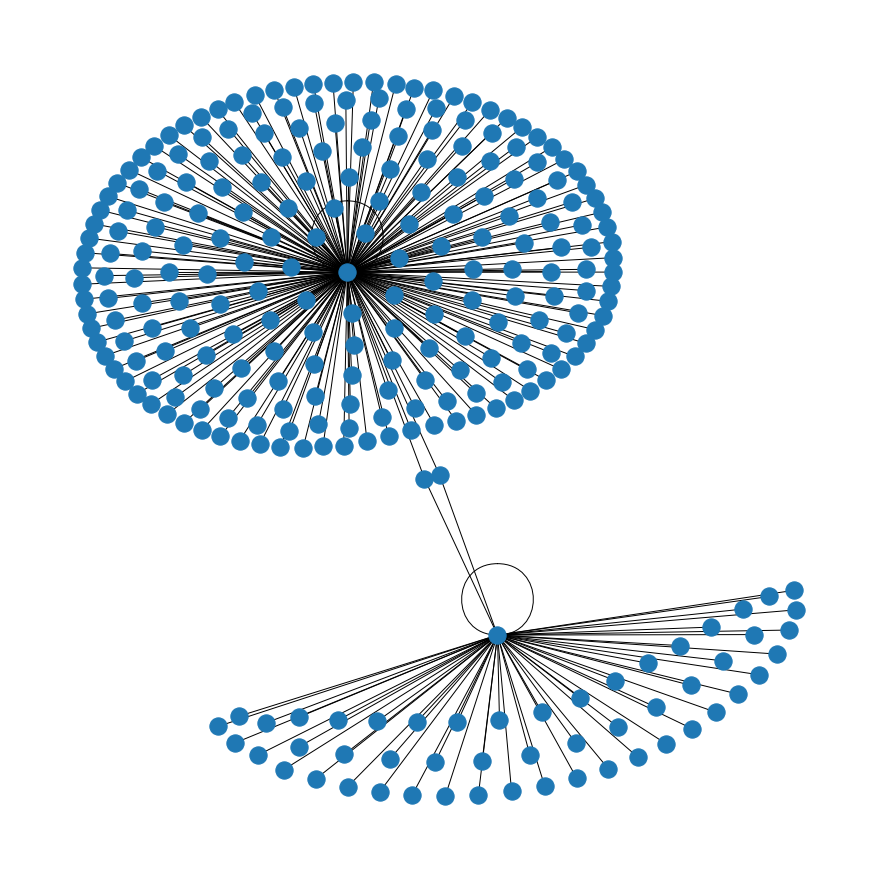

In [22]:
p.draw()

In [23]:
p.n_nodes

278

In [24]:
p.all_edges

[('HillaryClinton', 'timkaine'),
 ('HillaryClinton', 'POTUS'),
 ('HillaryClinton', 'mcuban'),
 ('HillaryClinton', 'ddlovato'),
 ('realDonaldTrump', 'GOP'),
 ('HillaryClinton', 'shondarhimes'),
 ('HillaryClinton', 'Hillary_esp'),
 ('HillaryClinton', 'JoeBiden'),
 ('HillaryClinton', 'AndrewJenks'),
 ('HillaryClinton', 'repjohnlewis'),
 ('HillaryClinton', 'jasoncollins98'),
 ('HillaryClinton', 'JoeBiden'),
 ('HillaryClinton', 'madeleine'),
 ('HillaryClinton', 'TheAtlantic'),
 ('HillaryClinton', 'ChadHGriffin'),
 ('HillaryClinton', 'hardball'),
 ('HillaryClinton', 'ezraklein'),
 ('HillaryClinton', 'machadooficial'),
 ('realDonaldTrump', 'TeamTrump'),
 ('HillaryClinton', 'TheBriefing2016'),
 ('realDonaldTrump', 'TeamTrump'),
 ('realDonaldTrump', 'TeamTrump'),
 ('HillaryClinton', 'TheBriefing2016'),
 ('HillaryClinton', 'TheBriefing2016'),
 ('realDonaldTrump', 'DanScavino'),
 ('HillaryClinton', 'TheBriefing2016'),
 ('HillaryClinton', 'BuzzFeedBen'),
 ('realDonaldTrump', 'TeamTrump'),
 ('realD

In [25]:
p.centrality.sort_values('betweenness', ascending = False)

,degree,closeness,betweenness,eigenvector,degree_nonnormal
HillaryClinton,0.815884,0.725131,0.961165,0.718771,227
realDonaldTrump,0.202166,0.383657,0.340776,0.008455,56
GMA,0.007220,0.501812,0.154594,0.046990,2
Morning_Joe,0.007220,0.501812,0.154594,0.046990,2
albamonica,0.003610,0.420973,0.000000,0.046444,1
...,...,...,...,...,...
HillaryForGA,0.003610,0.420973,0.000000,0.046444,1
postpolitics,0.003610,0.420973,0.000000,0.046444,1
IGNITE_National,0.003610,0.420973,0.000000,0.046444,1
Reince,0.003610,0.277555,0.000000,0.000546,1


## Edge and Node Lists

In [34]:
pd.DataFrame(p.all_edges, columns = [p.source_col, p.sink_col])

,handle,original_author
0,HillaryClinton,timkaine
1,HillaryClinton,POTUS
2,HillaryClinton,mcuban
3,HillaryClinton,ddlovato
4,realDonaldTrump,GOP
...,...,...
717,realDonaldTrump,SarahPalinUSA
718,realDonaldTrump,EricTrump
719,realDonaldTrump,JaniceTaylor912
720,realDonaldTrump,DRUDGE_REPORT


In [30]:
p.EDGELIST

AttributeError: 'DocumentGraphProcessing' object has no attribute 'EDGELIST'

## Centrality Measurements

In [28]:
deg = nx.degree_centrality(p.g)

In [29]:
closeness = nx.closeness_centrality(p.g)

In [141]:
betweenness = nx.betweenness_centrality(p.g)

In [142]:
eigen = nx.eigenvector_centrality(p.g)

In [143]:
cen = pd.DataFrame([deg, closeness, betweenness, eigen]).transpose()
cen.columns = ['degree', 'closeness', 'betweenness', 'eigenvector']
cen['degree_nonnormal'] = cen.degree.apply(lambda x: int(round(x * p.n_nodes)))

In [144]:
cen

,degree,closeness,betweenness,eigenvector,degree_nonnormal
Myriel,0.131579,0.429379,0.176842,0.028134,10
Napoleon,0.013158,0.301587,0.000000,0.002343,1
MlleBaptistine,0.039474,0.413043,0.000000,0.026873,3
MmeMagloire,0.039474,0.413043,0.000000,0.026873,3
CountessDeLo,0.013158,0.301587,0.000000,0.002343,1
...,...,...,...,...,...
Toussaint,0.039474,0.402116,0.000000,0.046885,3
Child1,0.026316,0.342342,0.000000,0.028879,2
Child2,0.026316,0.342342,0.000000,0.028879,2
Brujon,0.092105,0.380000,0.000439,0.101287,7
